# Importing important libraries and the Reuters Newswire Classification dataset 

https://keras.io/api/datasets/reuters/

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.preprocessing.text import Tokenizer
from keras.datasets import reuters

# Splitting the Train and Test dataset

In [132]:
max_words = 10000

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words, test_split=0.2)
word_index = reuters.get_word_index()

In [133]:
print("# of training samples: {}".format(len(x_train)))
print("# of testing samples: {}".format(len(x_test)))

num_classes = max(y_train) + 1
print("# of classes: {}".format(num_classes))

# of training samples: 8982
# of testing samples: 2246
# of classes: 46


In [ ]:
word_index


# Preparing the dataset for the neural nets

In [135]:
batch_size = 32
epoch = 10

In [136]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')

Vectorizing the data

In [137]:
print("Shape of x_train:",  x_train.shape)
print("Shape of x_test:",  x_test.shape)

print("Vectorized train data sample:", x_train[0])

Shape of x_train: (8982, 10000)
Shape of x_test: (2246, 10000)
Vectorized train data sample: [0. 1. 1. ... 0. 0. 0.]


In [138]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_y_train = to_one_hot(y_train)        
one_hot_y_test = to_one_hot(y_test)    

Using one-hot encoding for the train and test labels

In [139]:
print("Shape of trained label:", one_hot_y_train.shape)
print("Shape of test label:", one_hot_y_test.shape)

Shape of trained label: (8982, 46)
Shape of test label: (2246, 46)


# Building the Model

This multiclass classification requires a network with a much more dense layer as we are using 46 classifications for the text and we are therefore going to use 64 input layers and outputting 46 output layers

In [140]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(46,activation='softmax'))

In [141]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

# Training the model using 1,000 samples

In [142]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_y_train[:1000]
partial_y_train = one_hot_y_train[1000:]

In [143]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 54ms/step - loss: 2.6560 - accuracy: 0.4971 - val_loss: 1.7469 - val_accuracy: 0.6540
Epoch 2/20
16/16 [==============================] - 1s 44ms/step - loss: 1.4268 - accuracy: 0.7180 - val_loss: 1.3017 - val_accuracy: 0.7310
Epoch 3/20
16/16 [==============================] - 1s 44ms/step - loss: 1.0424 - accuracy: 0.7900 - val_loss: 1.1441 - val_accuracy: 0.7560
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.8124 - accuracy: 0.8296 - val_loss: 1.0242 - val_accuracy: 0.7780
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6437 - accuracy: 0.8636 - val_loss: 0.9506 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5121 - accuracy: 0.8924 - val_loss: 0.9182 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 45ms/step - loss: 0.4133 - accuracy: 0.9151 - val_loss: 0.8982 - val_accuracy: 0.8090
Epoch 8/20
16

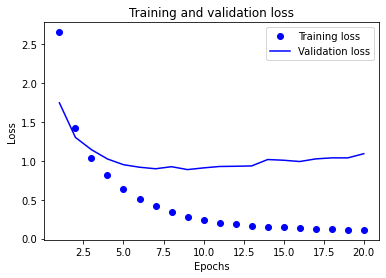

In [144]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

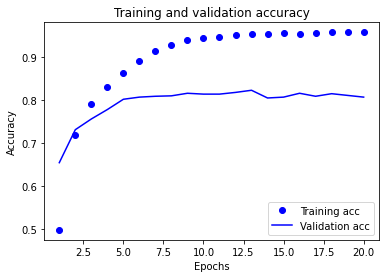

In [145]:
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Network begins to overfit after 8 epochs. Training the network using 8 epochs and validate using the test set

In [164]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(max_words,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_y_test)

Epoch 1/8
16/16 [==============================] - 2s 106ms/step - loss: 2.4842 - accuracy: 0.5266 - val_loss: 1.5461 - val_accuracy: 0.6710
Epoch 2/8
16/16 [==============================] - 1s 88ms/step - loss: 1.2201 - accuracy: 0.7466 - val_loss: 1.1809 - val_accuracy: 0.7290
Epoch 3/8
16/16 [==============================] - 1s 88ms/step - loss: 0.8527 - accuracy: 0.8245 - val_loss: 1.0090 - val_accuracy: 0.7870
Epoch 4/8
16/16 [==============================] - 1s 85ms/step - loss: 0.6328 - accuracy: 0.8676 - val_loss: 0.9592 - val_accuracy: 0.8020
Epoch 5/8
16/16 [==============================] - 1s 79ms/step - loss: 0.4631 - accuracy: 0.9054 - val_loss: 0.8877 - val_accuracy: 0.8230
Epoch 6/8
16/16 [==============================] - 1s 83ms/step - loss: 0.3579 - accuracy: 0.9247 - val_loss: 0.8818 - val_accuracy: 0.8250
Epoch 7/8
16/16 [==============================] - 1s 84ms/step - loss: 0.2777 - accuracy: 0.9396 - val_loss: 0.8718 - val_accuracy: 0.8220
Epoch 8/8
71/71 [==

Accuracy is used as a metric because the  80% of the train samples can be classified to belong to 1 of the 46 classification as for test samples can 20% are used to identify its classification

In [165]:
results

[0.9782055020332336, 0.7951914668083191]

This approach reaches an accuracy of ~79% given the test sample provided

In [173]:
predictions = model.predict(x_test)

print("Prediction shape ", predictions.shape)
print("Sum of all output probabilities ", np.sum(predictions[0]))

Prediction shape  (2246, 46)
Sum of all output probabilities  1.0
